#  Stock Price Forecasting using ARIMA and Prophet Models

In this project, i will develop a stock price forecasting system using different time series models.  
I will:
- Download stock data from Yahoo Finance.
- Visualize stock trends.
- Build ARIMA and Prophet models.
- Evaluate and compare model performance using MAE and RMSE.
- Visualize prediction results and errors.

#  Installing Required Libraries

We install all the necessary libraries including:
- `yfinance` for stock data
- `statsmodels` for ARIMA
- `prophet` for time series forecasting
- `sklearn` for evaluation metrics
- Visualization libraries like `matplotlib` and `seaborn`

In [ ]:
!pip install yfinance pandas matplotlib seaborn statsmodels prophet scikit-learn prophet


# 🛠 Importing Libraries

We import all necessary Python libraries to handle data loading, modeling, forecasting, and visualization.


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error


#  Loading Stock Data

We use `yfinance` to download **AAPL (Apple)** stock price data between 2015 and 2024.  
We focus only on the `Close` prices for forecasting.


In [18]:

def load_stock_data(ticker='AAPL', start='2015-01-01', end='2024-01-01'):
    df = yf.download(ticker, start=start, end=end)
    df = df[['Close']].dropna()
    df.reset_index(inplace=True)
    return df

df = load_stock_data('AAPL', start='2015-01-01', end='2024-01-01')
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close
Ticker,,AAPL
0,2015-01-02,24.320429
1,2015-01-05,23.635290
2,2015-01-06,23.637512
3,2015-01-07,23.968962
4,2015-01-08,24.889902


In [19]:

df.columns = ['Date', 'Close']

# Clean and prepare data
df = df[['Date', 'Close']]
df = df.dropna()

# Correct datatypes
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = df['Close'].astype(float)

# Check structure again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2264 non-null   datetime64[ns]
 1   Close   2264 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.5 KB


#  Visualizing Stock Price

Plotting the stock's historical **closing price** to observe trends and seasonality patterns.


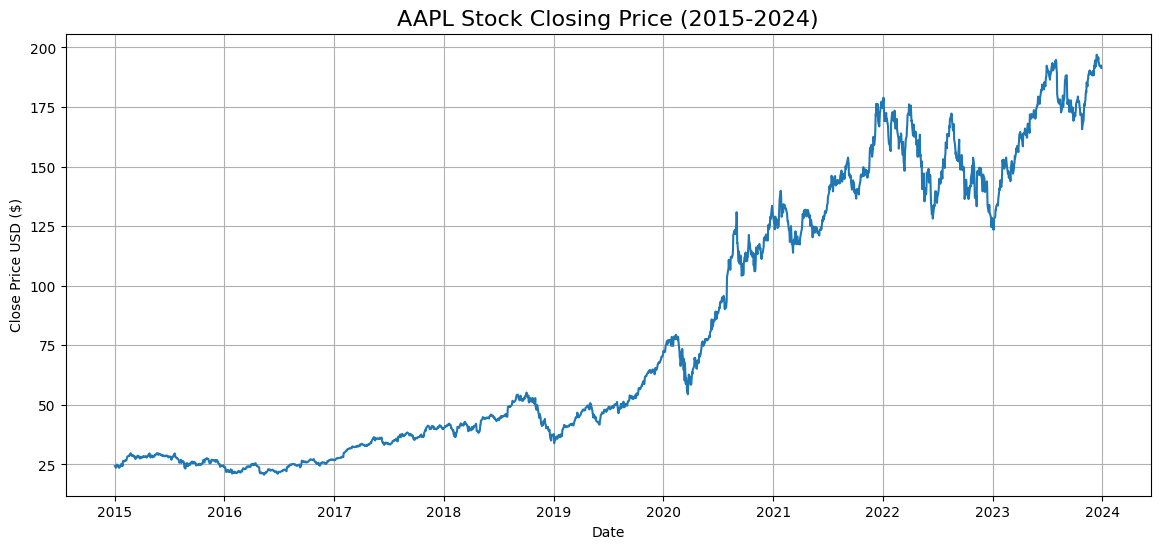

In [10]:
# Plot closing price
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'])
plt.title('AAPL Stock Closing Price (2015-2024)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.grid()
plt.show()


#  ARIMA Model Forecasting

The **ARIMA(5,1,0)** model is trained to predict the next 30 business days of stock prices.


In [20]:
# ARIMA Model
def arima_forecast(df, steps=30):
    model = ARIMA(df['Close'], order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    forecast_df = pd.DataFrame(forecast)
    forecast_df.columns = ['Forecast_ARIMA']
    return forecast_df

# ARIMA Prediction
arima_forecast_df = arima_forecast(df, steps=30)
arima_forecast_df.head()


,Forecast_ARIMA
2264,191.367420
2265,191.365633
2266,191.381673
2267,191.401484
2268,191.359059


#  Prophet Model Forecasting

We use Facebook's **Prophet** model to predict the future 30 business days.  
Prophet is robust to missing data and trend shifts.


In [29]:
def prophet_forecast(df, periods=30):
    prophet_df = df[['Date', 'Close']].copy()
    prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
    if not np.issubdtype(prophet_df['ds'].dtype, np.datetime64):
        prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])
    prophet_df['y'] = prophet_df['y'].astype(float)
    model = Prophet()
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=periods)

    # Predict the future
    forecast = model.predict(future)

    return model, forecast[['ds', 'yhat']]

# Prophet Prediction
model, prophet_forecast_df = prophet_forecast(df, periods=30)
prophet_forecast_df.tail(30)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8fxgrrw/jic9xols.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8fxgrrw/82sl5fp1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83605', 'data', 'file=/tmp/tmpl8fxgrrw/jic9xols.json', 'init=/tmp/tmpl8fxgrrw/82sl5fp1.json', 'output', 'file=/tmp/tmpl8fxgrrw/prophet_model9ggd390l/prophet_model-20250427104011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:40:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:40:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat
2264,2023-12-30,174.702074
2265,2023-12-31,174.545624
2266,2024-01-01,177.058817
2267,2024-01-02,176.796789
2268,2024-01-03,176.674244
2269,2024-01-04,176.426363
2270,2024-01-05,176.184119
2271,2024-01-06,173.563236
2272,2024-01-07,173.416892
2273,2024-01-08,175.958704


#  Visualizing Future Trends with Prophet

- The forecast plot shows Apple stock price predictions for the next `30 days` (or the `periods` you choose).
- The component plot shows the underlying trends, seasonality, and any holidays that Prophet detects.

This helps us to visualize not only the predicted stock price but also how the stock behaves seasonally and in terms of long-term trends.


# 1. Plot the forecast and historical data

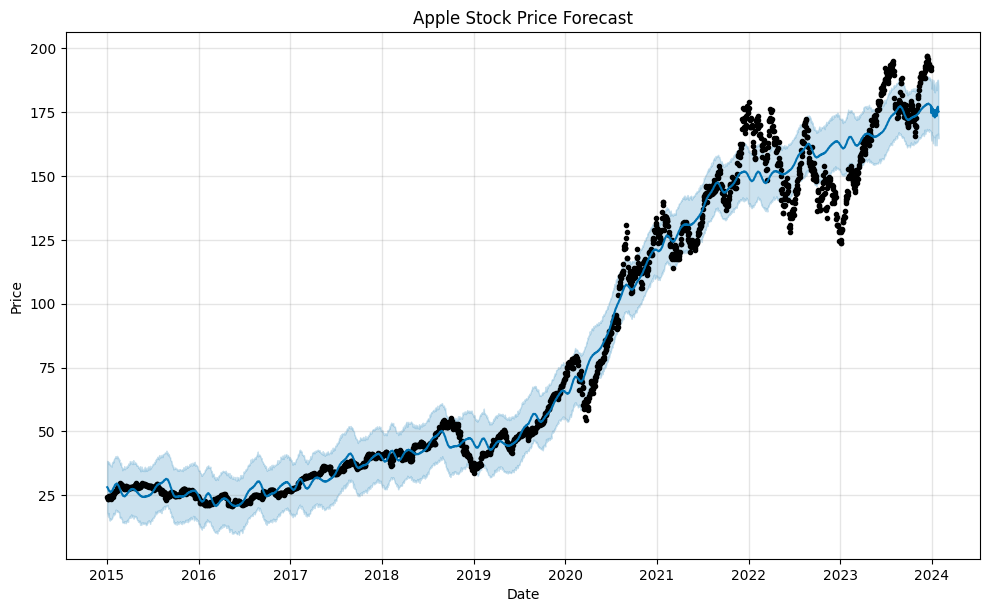

In [30]:
fig1 = model.plot(model.predict(model.make_future_dataframe(periods=30)))
plt.title('Apple Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()



# 2. Plot the components (trend, weekly, yearly seasonality)

In [34]:
from prophet.plot import plot_components_plotly
fig2 = plot_components_plotly(model, model.predict(model.make_future_dataframe(periods=30)))
fig2.show()

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



#  Comparing Forecasts

We plot actual stock prices against forecasts from both ARIMA and Prophet models to visually compare their performance.


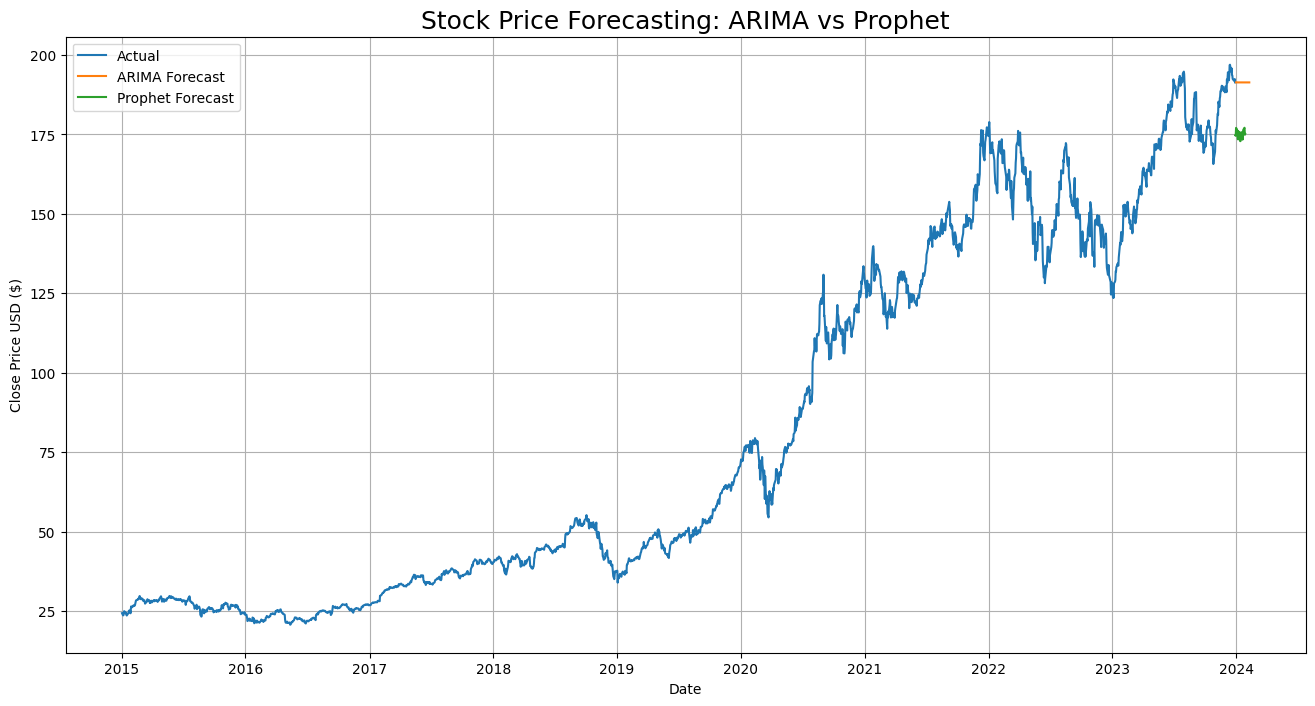

In [14]:
# Plot actual and forecasts
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Close'], label='Actual')

# ARIMA Plot
future_dates = pd.date_range(df['Date'].iloc[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, arima_forecast_df['Forecast_ARIMA'], label='ARIMA Forecast')

# Prophet Plot
plt.plot(prophet_forecast_df['ds'][-30:], prophet_forecast_df['yhat'][-30:], label='Prophet Forecast')

plt.title('Stock Price Forecasting: ARIMA vs Prophet', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.grid()
plt.show()


#  Evaluating Model Performance

We calculate the following metrics:
- **MAE** (Mean Absolute Error)
- **RMSE** (Root Mean Squared Error)

Lower values indicate better forecasting performance.


In [15]:
# Evaluation function
def evaluate_forecast(true, predicted, model_name="Model"):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    print(f"{model_name} MAE: {mae:.2f}")
    print(f"{model_name} RMSE: {rmse:.2f}")


true_values = df['Close'].iloc[-30:].values
print("\n--- ARIMA Evaluation ---")
evaluate_forecast(true_values, arima_forecast_df['Forecast_ARIMA'].values, model_name="ARIMA")
print("\n--- Prophet Evaluation ---")
evaluate_forecast(true_values, prophet_forecast_df['yhat'].iloc[-30:].values, model_name="Prophet")



--- ARIMA Evaluation ---
ARIMA MAE: 2.25
ARIMA RMSE: 2.68

--- Prophet Evaluation ---
Prophet MAE: 16.40
Prophet RMSE: 16.69


#  Error Distribution Visualization

Analyzing the distribution of prediction errors helps understand model bias and spread.


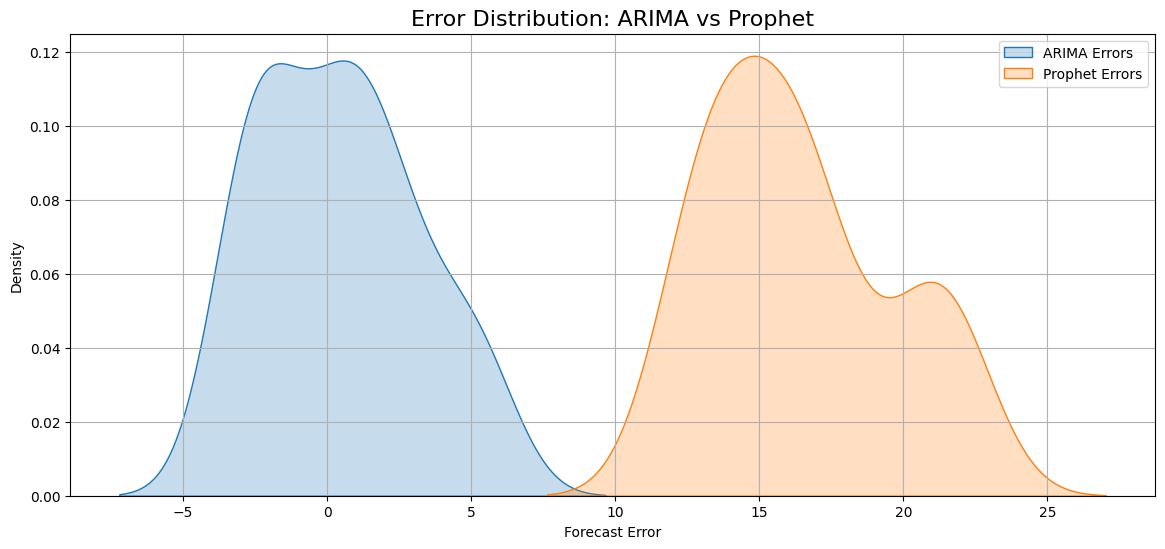

In [16]:
# Plot error distributions
arima_errors = true_values - arima_forecast_df['Forecast_ARIMA'].values
prophet_errors = true_values - prophet_forecast_df['yhat'].iloc[-30:].values

plt.figure(figsize=(14,6))
sns.kdeplot(arima_errors, label='ARIMA Errors', fill=True)
sns.kdeplot(prophet_errors, label='Prophet Errors', fill=True)
plt.title('Error Distribution: ARIMA vs Prophet', fontsize=16)
plt.xlabel('Forecast Error')
plt.legend()
plt.grid()
plt.show()
